In [97]:
import shared_methods as shared_methods
import importlib
importlib.reload(shared_methods)
from shared_methods import Config

from IPython.display import Markdown

In [98]:
'''
config = Config({'expiration': '29DEC17',
        'strikes' : [
            5000, 8000, 10000, 
            11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 
            21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 
            32000, 34000, 35000, 36000, 38000, 40000, 42000, 45000, 50000, 55000, 
            60000, 65000, 70000, 75000, 80000, 90000, 100000, 
            110000, 120000, 130000, 140000, 150000, 
            160000, 170000, 180000, 190000, 200000]
         })

'''

"\nconfig = Config({'expiration': '29DEC17',\n        'strikes' : [\n            5000, 8000, 10000, \n            11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, \n            21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, \n            32000, 34000, 35000, 36000, 38000, 40000, 42000, 45000, 50000, 55000, \n            60000, 65000, 70000, 75000, 80000, 90000, 100000, \n            110000, 120000, 130000, 140000, 150000, \n            160000, 170000, 180000, 190000, 200000]\n         })\n\n"

In [99]:

config = Config({'expiration': '29DEC17',
        'strikes' : [
#            '1500', '2000', '2500', '3000', '3500', 
            '4000', '4500', '5000',
            '5500', '6000', '6500', '7000', '7500'
        ]
         })

In [100]:
'''
config = Config({'expiration': '31MAR23',
        'strikes' : [
            10000, 20000, 25000,
            40000, 50000, 60000, 70000, 
            100000, 150000, 200000]
         })
'''

"\nconfig = Config({'expiration': '31MAR23',\n        'strikes' : [\n            10000, 20000, 25000,\n            40000, 50000, 60000, 70000, \n            100000, 150000, 200000]\n         })\n"

In [101]:
display(Markdown(f'## Expiration: **{config.expiration}**'))

## Expiration: **29DEC17**

In [102]:
display(Markdown(f'### Strikes {config.strikes}'))

### Strikes ['4000', '4500', '5000', '5500', '6000', '6500', '7000', '7500']

In [103]:
merged_df = shared_methods.getMergedDataframe(config)

startDate = merged_df.iloc[-1]['timestamp'].strftime('%Y-%m-%d')
startPrice = merged_df.iloc[-1]['btc_usd']

endDate = merged_df.iloc[0]['timestamp'].strftime('%Y-%m-%d')
endPrice = merged_df.iloc[0]['btc_usd']


"These strikes don't have any data:"

[]

In [104]:
display(Markdown(f'## Start price at {startDate}: **{startPrice}**'))

## Start price at 2017-08-07: **3387.55**

In [105]:
display(Markdown(f'## End price at {endDate}: **{endPrice}**'))

## End price at 2017-12-23: **14619.0**

In [106]:
def filter(df):
    #pd.set_option('display.width', 1000)
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        strike = 5000
        month = 1
        year = 2023
        result = df.loc[(pd.to_datetime(df['timestamp']).dt.month == month) 
                        & (pd.to_datetime(df['timestamp']).dt.year == year)

                       ]
        result = result.dropna(axis=1, how='all')
#        result = result.loc[:, ['timestamp', 'btc_usd', f'option_{strike}_usd']]

        display(result)

In [107]:

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    display(merged_df)
#    display(merged_df.loc[:, ['timestamp', 'btc_usd', f'option_5000_usd']].dropna(axis=1, how='all'))
#filter(merged_df)
#display(merged_df)

In [108]:


shared_methods.plotSurface(merged_df)

* At the beginning only the out of the money options have been traded.


In [109]:
shared_methods.plotSurface(merged_df.interpolate(method='linear')) #cubic vs linear

* Obviously options with a lower strike have more intrinsic value and thus are more pricy.
* As the BTC price declines the option prices decline.
* Soon before expiration the atm options increase the most in fixed dollar terms (not percentage wise)
* Soon before expiration the out of the money options go to zero.
* The options that are way in the money don't move much.

### Show the Plain prices of BTC and the Options

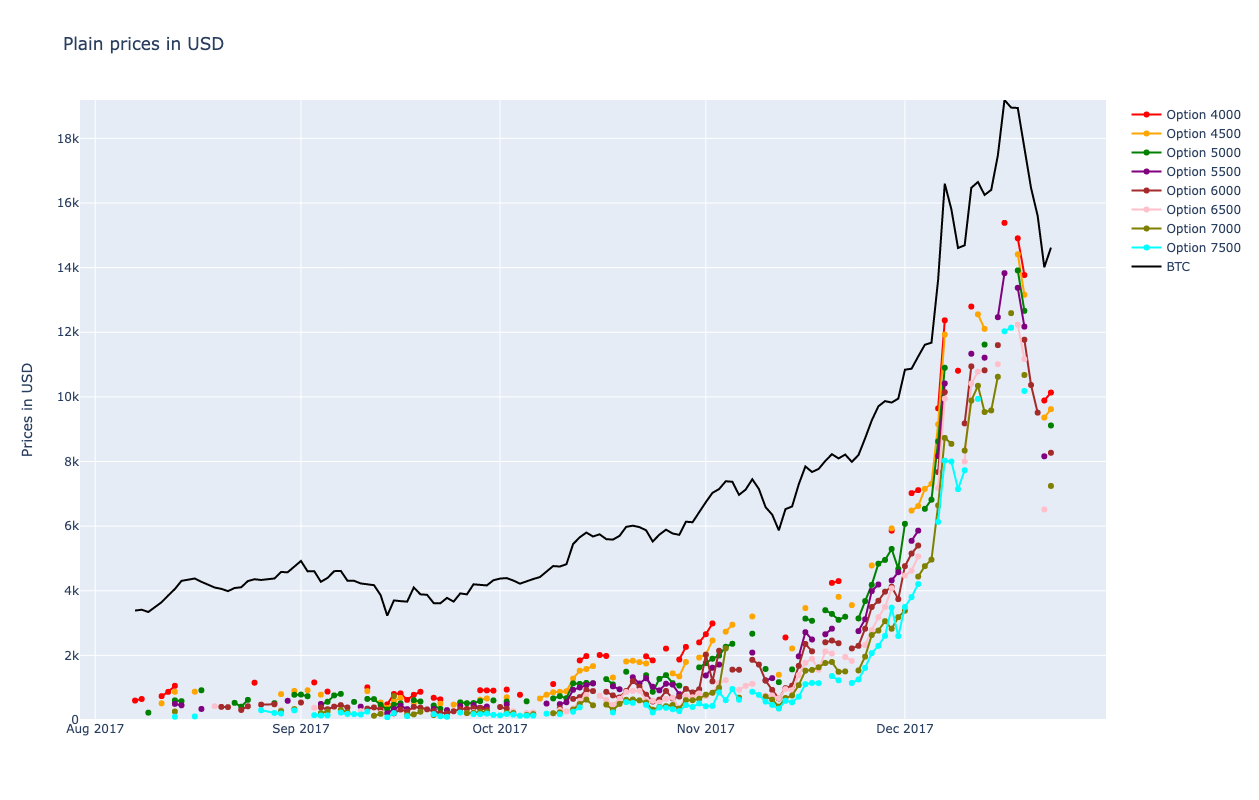

In [110]:

shared_methods.showPlainPriceChart(merged_df, config.strikes)

In [111]:
shared_methods.getTradingViewWidget("Bitstamp:BTCUSD")


### Move the lines up to the same startpoint of BTC to roughly visualize the delta

In [112]:

df_shifted = shared_methods.shiftLinesToTheStartOfBTC(merged_df, config.strikes)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    display(df_shifted)

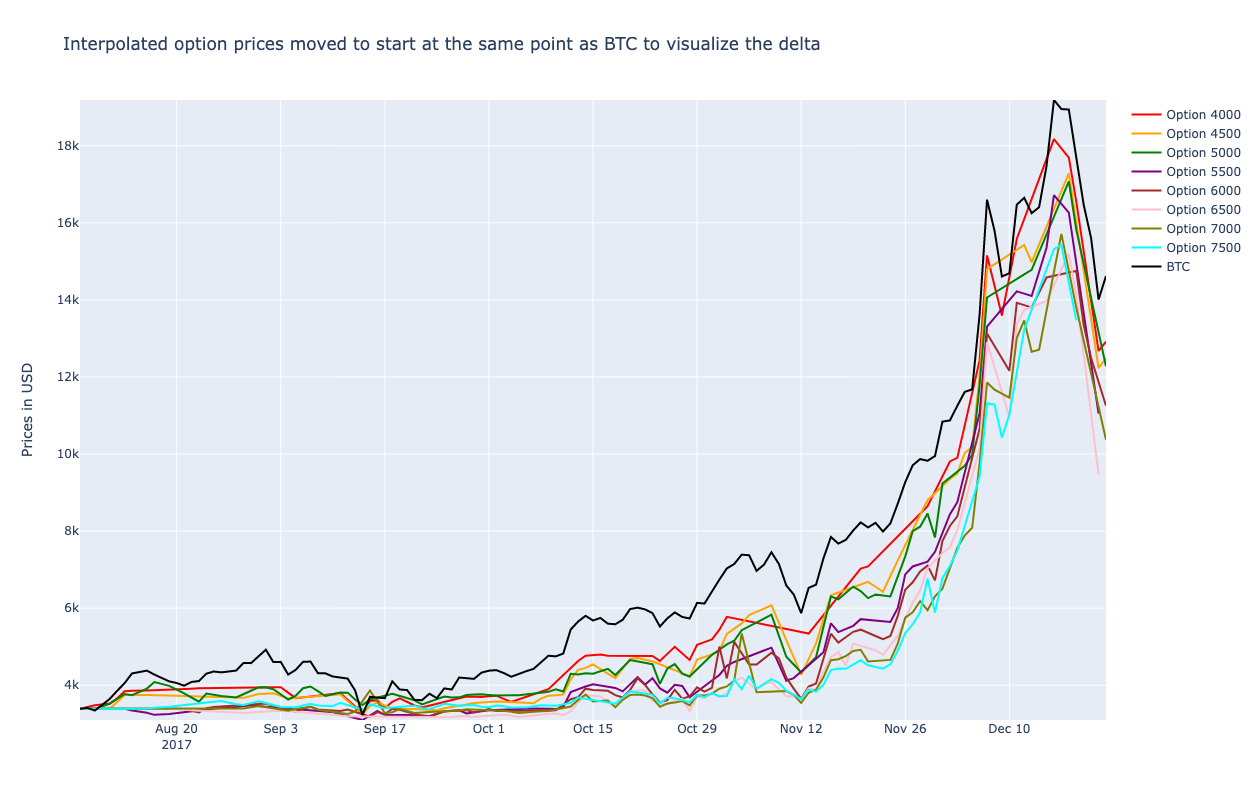

In [113]:
shared_methods.showOffsettedPriceChart(df_shifted, config.strikes)

The more the option is in the money the more it follows the price movements of BTC (=higher delta). But it's interpolated which distorts the picture as there aren't always trades while the line doesn't really show that.

In [114]:
dfPricesChangedUSD = shared_methods.getPriceChanges(merged_df, config.strikes)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    display(dfPricesChangedUSD)

### Absolute changes in USD compared to previous day. The Delta.

Disable the BTC plot in the legend of the chart if it overlays the other plots too much!

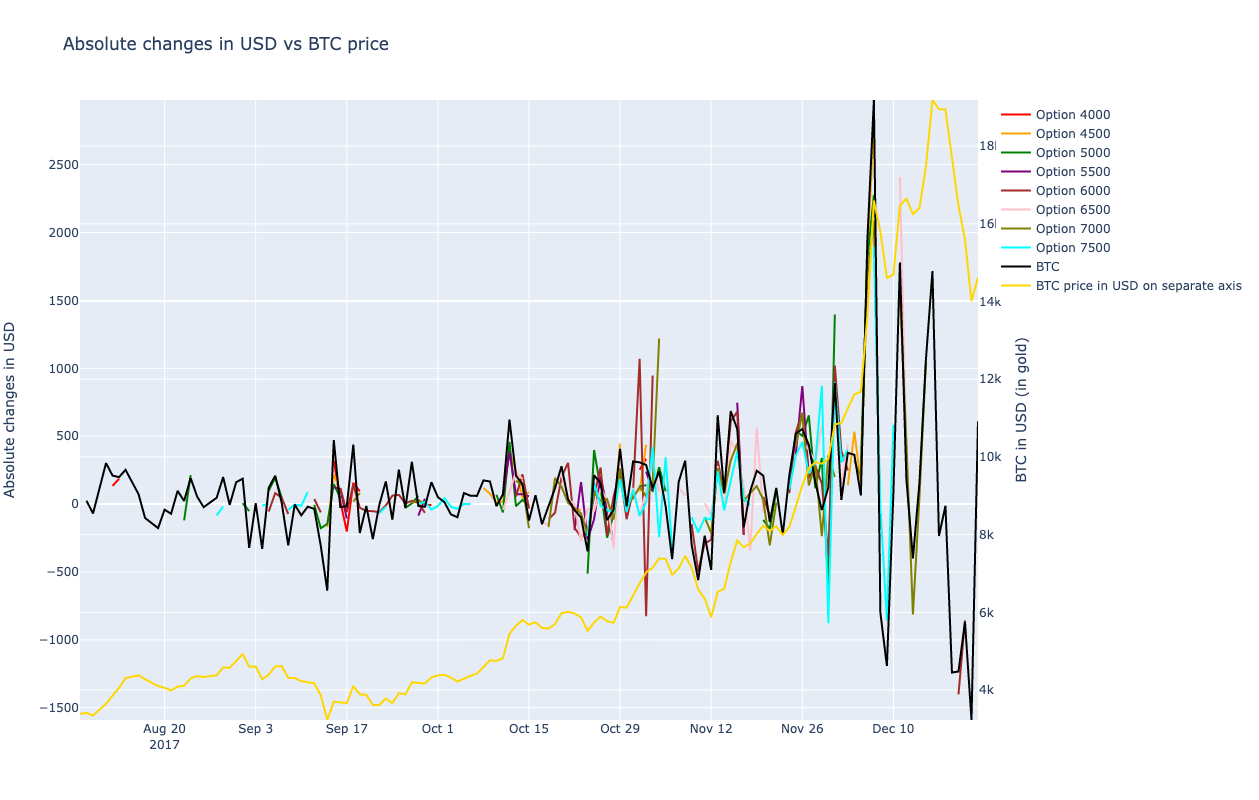

In [115]:
shared_methods.plotOptionPricesChangedUSD(dfPricesChangedUSD, config.strikes)


### Percent changes compared to previous data point relative to the BTC price

#### The out of the money options fluctuate more than the options that are more in the money.

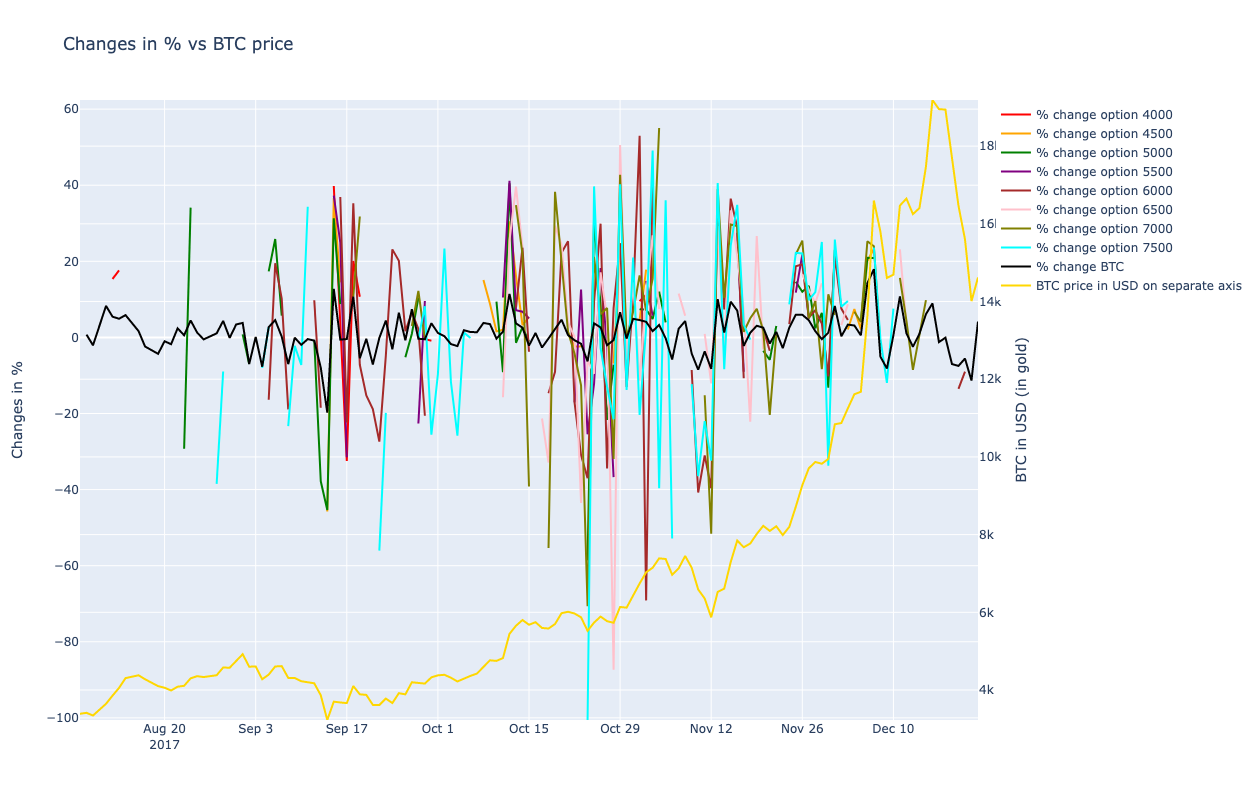

In [116]:
display(Markdown('#### The out of the money options fluctuate more than the options that are more in the money.'))
shared_methods.plotOptionPricesChangedPercent(dfPricesChangedUSD, config.strikes)

## Price increase in %

In [117]:

interpolated_df = merged_df.interpolate(method='linear') # or cubic
df_percent_all = shared_methods.calcGains(interpolated_df, config.strikes)

#with pd.option_context('display.max_rows', None):
#    display(df_percent_all)
df_percent_all

,timestamp,btc_usd,btc_percent_all,option_4000_usd,option_4000_percent_all,option_4500_usd,option_4500_percent_all,option_5000_usd,option_5000_percent_all,option_5500_usd,option_5500_percent_all,option_6000_usd,option_6000_percent_all,option_6500_usd,option_6500_percent_all,option_7000_usd,option_7000_percent_all,option_7500_usd,option_7500_percent_all
0,2017-12-23,14619.00,331.550826,10133.890000,1584.405698,9619.300,1762.364717,9114.950000,3921.597176,NaN,NaN,8269.97,1937.590854,NaN,NaN,7243.7100,2649.036053,NaN,NaN
1,2017-12-22,14009.79,313.567032,9888.110000,1543.553347,9359.940,1712.150781,10001.857500,4312.908670,8160.700000,1535.312506,8890.65,2090.516668,6514.550000,1422.126685,8101.9425,2974.740987,NaN,NaN
115,2017-12-21,15600.01,360.510103,11182.273333,1758.662855,10626.610,1957.387079,10888.765000,4704.220163,9498.486667,1803.389910,9511.33,2243.442482,8066.523333,1784.745750,8960.1750,3300.445920,NaN,NaN
116,2017-12-20,16466.98,386.102936,12476.436667,1973.772363,11893.280,2202.623376,11775.672500,5095.531657,10836.273333,2071.467313,10367.61,2454.416439,9618.496667,2147.364814,9818.4075,3626.150854,NaN,NaN
2,2017-12-19,17700.00,422.501513,13770.600000,2188.881871,13159.950,2447.859674,12662.580000,5486.843150,12174.060000,2339.544717,11768.73,2799.630424,11170.470000,2509.983878,10676.6400,3951.855787,10182.81,9947.173162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,2017-08-12,3855.10,13.802010,871.640000,44.879743,694.655,34.490136,480.936667,112.193544,499.030000,0.000000,405.87,0.000000,427.990000,0.000000,263.5000,0.000000,101.35,0.000000
47,2017-08-11,3645.06,7.601659,737.760000,22.626864,516.510,0.000000,353.793333,56.096772,499.030000,0.000000,405.87,0.000000,427.990000,0.000000,263.5000,0.000000,101.35,0.000000
107,2017-08-09,3342.99,-1.315405,693.910000,15.338331,516.510,0.000000,226.650000,0.000000,499.030000,0.000000,405.87,0.000000,427.990000,0.000000,263.5000,0.000000,101.35,0.000000
48,2017-08-08,3412.41,0.733864,650.060000,8.049798,516.510,0.000000,226.650000,0.000000,499.030000,0.000000,405.87,0.000000,427.990000,0.000000,263.5000,0.000000,101.35,0.000000


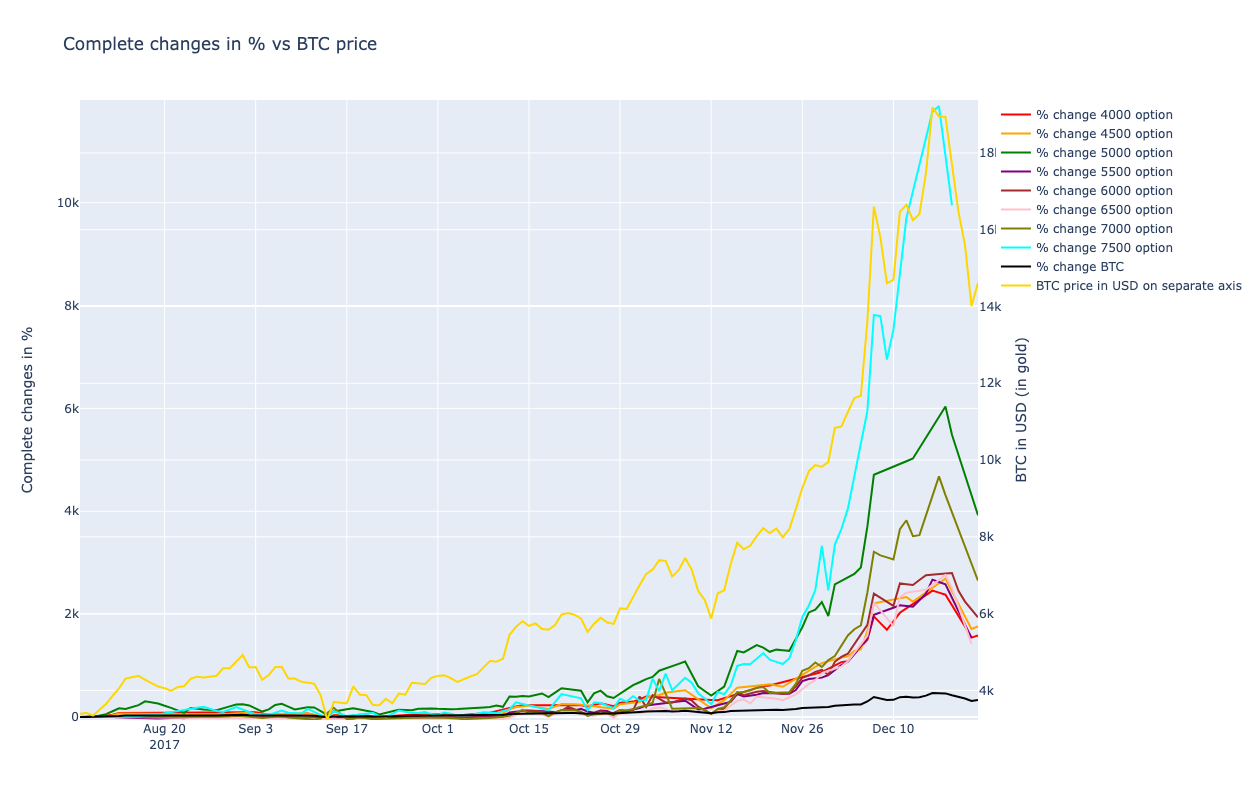

In [118]:
shared_methods.plotOptionPricesChangedPercentAll(df_percent_all, config.strikes)